# Setting Environment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import ast
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import  Dense
from keras.utils import to_categorical


In [3]:
df = pd.read_csv('./cbow_tweets.csv')
X = df.tweet
y = df.sentimen
df

,sentimen,tweet
0,2,"[-0.23693527, 0.4661431, 0.18114139, 0.0412429..."
1,0,"[-0.22296488, 0.39398727, -0.08384471, -0.0073..."
2,0,"[-0.20492682, 0.38979286, 0.13093518, 0.001421..."
3,1,"[-0.22495545, 0.3846609, 0.06029179, -0.004197..."
4,1,"[-0.19274125, 0.33150145, 0.108148955, 0.00647..."
...,...,...
3622,1,"[-0.25888678, 0.42448446, -0.04033168, 0.02534..."
3623,0,"[-0.0411884, 0.0726178, 0.017441615, -0.006870..."
3624,1,"[-0.28592643, 0.46843383, -0.06715221, 0.05487..."
3625,2,"[-0.42324647, 0.6188472, -0.39290512, 0.063082..."


# Data Modeling

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, to_categorical(y,3), test_size=0.30, random_state=42)

In [5]:
X_train.shape

(2538,)

In [6]:
max_len = 5000
# Ubah string menjadi daftar
X_train = X_train.apply(ast.literal_eval)
X_test = X_test.apply(ast.literal_eval)


In [7]:
X_train, X_test, y_train, y_test

(2750    [-0.16739282, 0.3037498, 0.1095004, -0.0168874...
 1926    [-0.22296488, 0.39398727, -0.08384471, -0.0073...
 2827    [-0.04836996, 0.29832825, -0.069404125, -0.122...
 772     [-0.15679042, 0.2838059, 0.10042761, -0.003986...
 2312    [-0.15137792, 0.2739695, 0.10216854, -0.000640...
                               ...                        
 1130    [0.056327455, 0.26789474, -0.351737, -0.138519...
 1294    [-0.10576344, 0.19828708, 0.08567187, -0.01569...
 860     [-0.13930349, 0.25616685, 0.096121155, 0.00048...
 3507    [-0.11593732, 0.23687796, 0.08598387, -0.01728...
 3174    [-0.2327762, 0.31767967, 0.30718577, -0.028748...
 Name: tweet, Length: 2538, dtype: object,
 602     [-0.22495545, 0.3846609, 0.06029179, -0.004197...
 1826    [-0.13874248, 0.275784, 0.026293451, -0.019701...
 2404    [-0.17464893, 0.31447002, 0.13787124, -0.02362...
 3178    [-0.3476616, 0.6700046, 0.013283921, 0.1623264...
 2507    [-0.10122596, 0.17598279, 0.05153378, 0.008293...
             

In [8]:
# Gunakan pad_sequences
X_train = pad_sequences(X_train, maxlen=max_len, value=0)
X_test = pad_sequences(X_test, maxlen=max_len, value=0)

In [9]:
X_train, X_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2538, 5000), (1089, 5000), (2538, 3), (1089, 3))

# Model Training with:

In [11]:
X_train.shape

(2538, 5000)

In [12]:
# Neural Network architecture

snn_model = Sequential()
# input layer + hidden layer
snn_model.add(Dense(64, input_dim=max_len, activation='relu'))
# hidden layer
snn_model.add(Dense(64, activation='relu'))
snn_model.add(Dense(64, activation='relu'))
# output layer
snn_model.add(Dense(3, activation='softmax'))

In [13]:
# Model compiling

snn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(snn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 328579 (1.25 MB)
Trainable params: 328579 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [14]:
# Model training

snn_model_history = snn_model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))
snn_model_history

Epoch 1/50


159/159 [==============================] - 3s 10ms/step - loss: 1.0834 - acc: 0.3700 - val_loss: 1.0659 - val_acc: 0.4408
Epoch 2/50
159/159 [==============================] - 1s 8ms/step - loss: 1.0517 - acc: 0.4354 - val_loss: 1.0504 - val_acc: 0.4490
Epoch 3/50
159/159 [==============================] - 1s 8ms/step - loss: 1.0139 - acc: 0.4862 - val_loss: 1.0566 - val_acc: 0.4353
Epoch 4/50
159/159 [==============================] - 1s 8ms/step - loss: 0.9695 - acc: 0.5193 - val_loss: 1.0746 - val_acc: 0.4408
Epoch 5/50
159/159 [==============================] - 1s 9ms/step - loss: 0.9022 - acc: 0.5611 - val_loss: 1.0934 - val_acc: 0.4656
Epoch 6/50
159/159 [==============================] - 1s 8ms/step - loss: 0.8409 - acc: 0.6123 - val_loss: 1.1333 - val_acc: 0.4656
Epoch 7/50
159/159 [==============================] - 1s 7ms/step - loss: 0.7783 - acc: 0.6454 - val_loss: 1.1629 - val_acc: 0.4545
Epoch 8/50
159/159 [==============================] - 1s 7ms/step - loss: 0.7216 - acc

# Model Evaluation

In [15]:
baseline_test_acc = np.mean(np.dot(y_test, np.arange(3)) == 2)
baseline_test_acc

0.32966023875114786

In [16]:
# Predictions on the Test Set

score = snn_model.evaluate(X_test, y_test, verbose=1)

 1/35 [..............................] - ETA: 3s - loss: 2.5524 - acc: 0.5625

35/35 [==============================] - 0s 3ms/step - loss: 3.4688 - acc: 0.5335


In [17]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 3.468782663345337
Test Accuracy: 0.5335170030593872


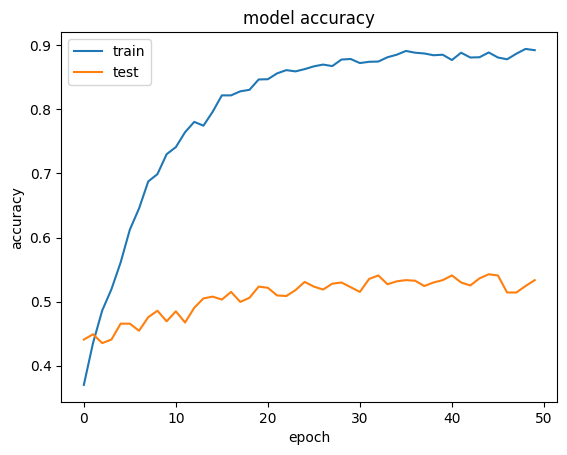

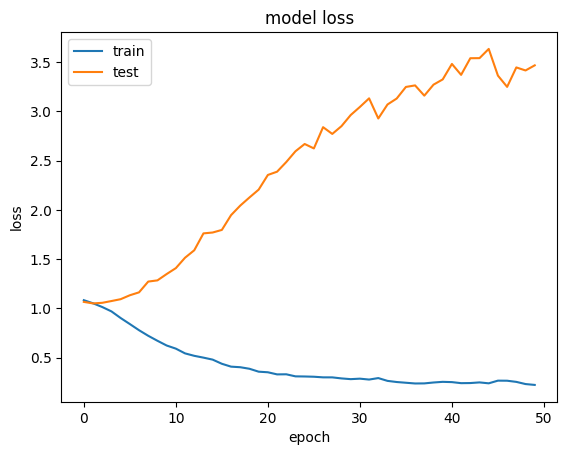

In [18]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [19]:
# mengembalikan to_categorical y_test menjadi list
y_test = np.argmax(y_test,axis=1)
y_test

array([2, 1, 1, ..., 2, 1, 1], dtype=int64)

In [20]:
# predict y_pred untuk Confusion Matrix
y_pred = snn_model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class

35/35 [==============================] - 0s 2ms/step


array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [21]:
cm = confusion_matrix(y_test, y_pred_class)

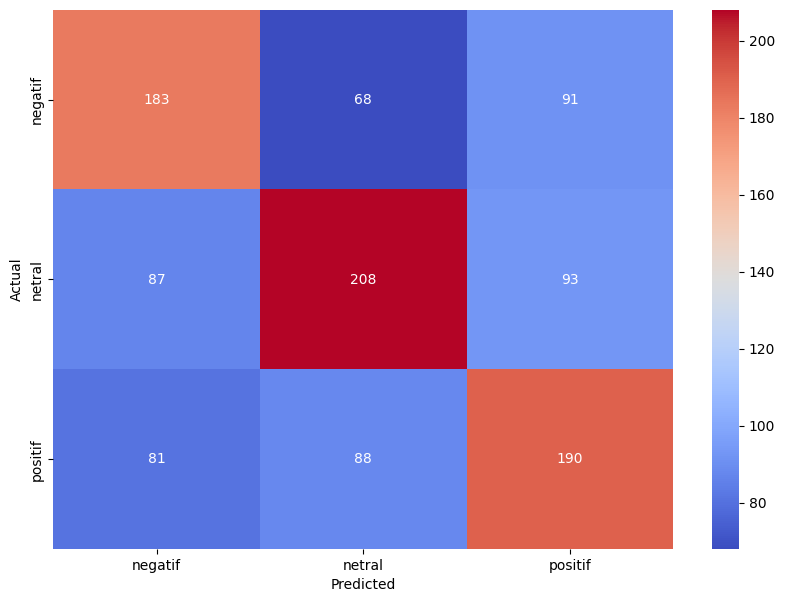

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
report = classification_report(y_test, y_pred_class)
print(report)

# Hitung dan cetak accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy}')

              precision    recall  f1-score   support

           0       0.52      0.54      0.53       342
           1       0.57      0.54      0.55       388
           2       0.51      0.53      0.52       359

    accuracy                           0.53      1089
   macro avg       0.53      0.53      0.53      1089
weighted avg       0.53      0.53      0.53      1089

Accuracy: 0.5335169880624426
